# Analise Exploratoria

📦 Importando as bibliotecas

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de Gráfico
sns.set(style="whitegrid")

# Importando o CSV
df = pd.read_csv('dataset_vendas.csv', sep=';')

🔍 Visão geral do dataset

In [46]:
df.shape # Mostra a quantidade de linhas e colunas do DataFrame(DF)

(1000, 6)

In [47]:
df.columns # Verificando as colunas

Index(['ID_Pedido', 'Data_Compra', 'Cliente_ID', 'Valor_Total',
       'Categoria_Produto', 'Quantidade'],
      dtype='object')

In [48]:
df.dtypes # Verificando os tipos de dados

ID_Pedido              int64
Data_Compra           object
Cliente_ID             int64
Valor_Total          float64
Categoria_Produto     object
Quantidade             int64
dtype: object

In [49]:
df.info() # Informações gerais do DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_Pedido          1000 non-null   int64  
 1   Data_Compra        1000 non-null   object 
 2   Cliente_ID         1000 non-null   int64  
 3   Valor_Total        1000 non-null   float64
 4   Categoria_Produto  1000 non-null   object 
 5   Quantidade         1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [50]:
df.head() # Visualiza as 5 primeiras linhas do DataFrame

,ID_Pedido,Data_Compra,Cliente_ID,Valor_Total,Categoria_Produto,Quantidade
0,1001,2024-01-01,551,607.50,Roupas,1
1,1002,2024-01-02,592,758.17,Beleza,2
2,1003,2024-01-05,514,460.08,Roupas,6
3,1004,2024-01-04,571,171.20,Eletrônicos,5
4,1005,2024-01-05,560,319.59,Beleza,7


In [51]:
df.tail() # Últimas 5 linhas do DataFrame

,ID_Pedido,Data_Compra,Cliente_ID,Valor_Total,Categoria_Produto,Quantidade
995,1996,2026-09-22,509,834.76,Beleza,4
996,1997,2026-09-23,566,792.93,Esportes,3
997,1998,2026-09-24,517,723.31,Beleza,3
998,1999,2026-09-25,599,84.35,Beleza,3
999,2000,2026-09-26,585,337.97,Eletrônicos,6


🧼 Verificação e tratamento de dados faltantes

In [52]:
df.isnull().sum() # Verificando valores nulos.

ID_Pedido            0
Data_Compra          0
Cliente_ID           0
Valor_Total          0
Categoria_Produto    0
Quantidade           0
dtype: int64

In [53]:
df.dropna(inplace=True) # Removendo linhas com valores nulos.

📊 Estatísticas descritivas

In [54]:
df.describe(include='all') # Mostra as estatísticas gerais do DataFrame

,ID_Pedido,Data_Compra,Cliente_ID,Valor_Total,Categoria_Produto,Quantidade
count,1000.000000,1000,1000.000000,1000.000000,1000,1000.000000
unique,NaN,612,NaN,NaN,5,NaN
top,NaN,2024-09-09,NaN,NaN,Esportes,NaN
freq,NaN,6,NaN,NaN,220,NaN
mean,1500.500000,NaN,549.128000,525.307940,NaN,4.945000
std,288.819436,NaN,29.573505,275.969012,NaN,2.614347
min,1001.000000,NaN,500.000000,54.400000,NaN,1.000000
25%,1250.750000,NaN,523.000000,275.285000,NaN,3.000000
50%,1500.500000,NaN,550.000000,534.640000,NaN,5.000000
75%,1750.250000,NaN,574.000000,756.435000,NaN,7.000000


🔢 Análise de variáveis numéricas

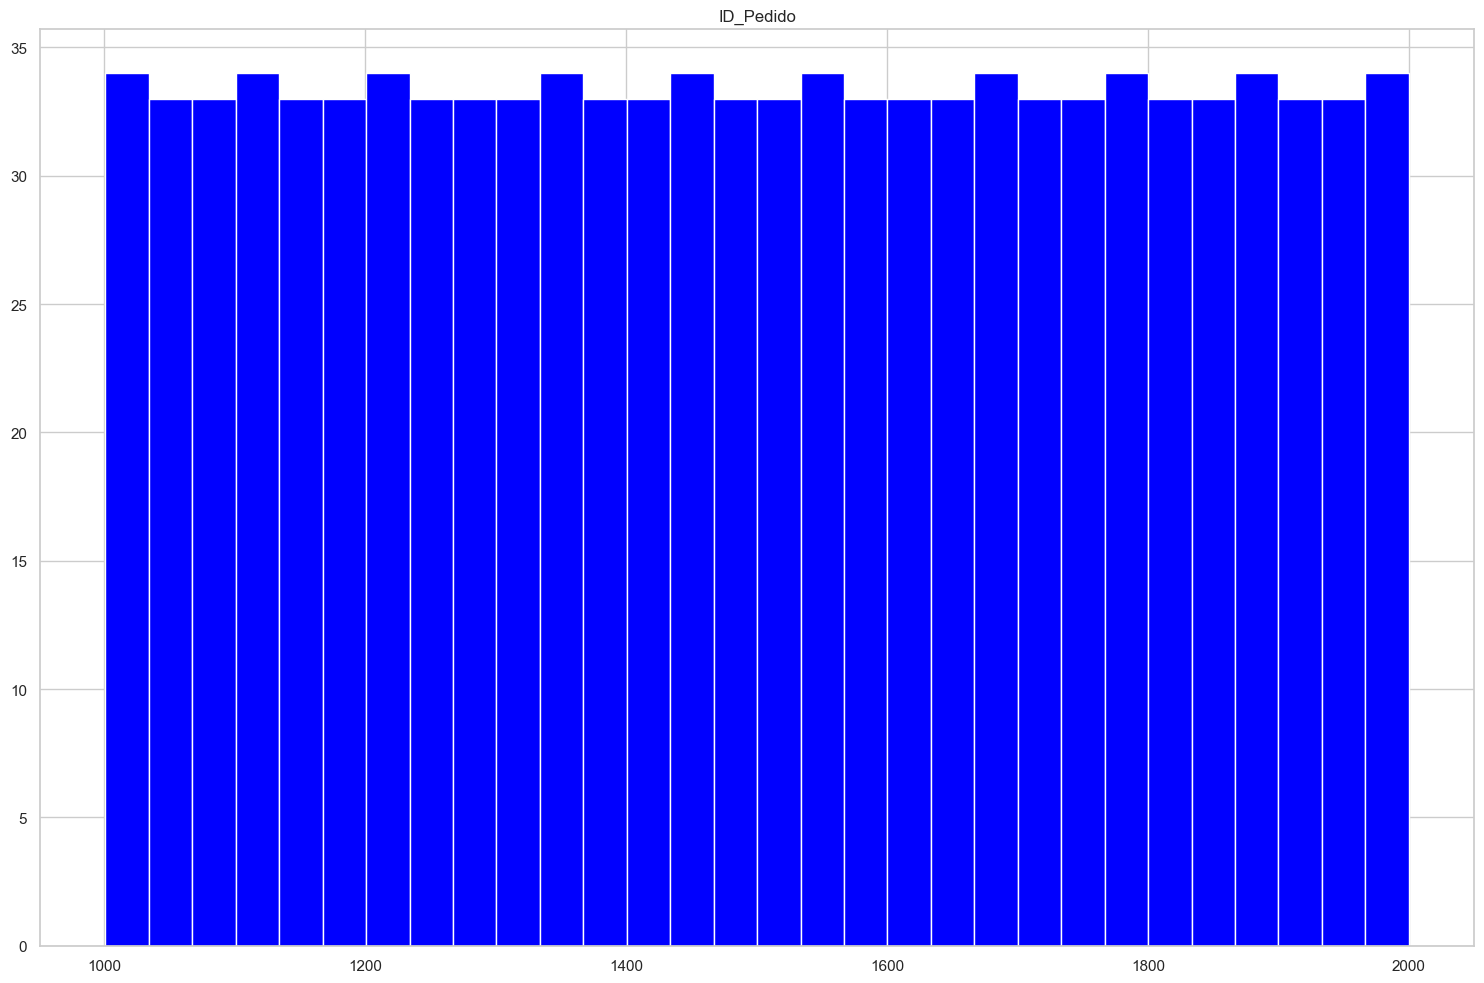

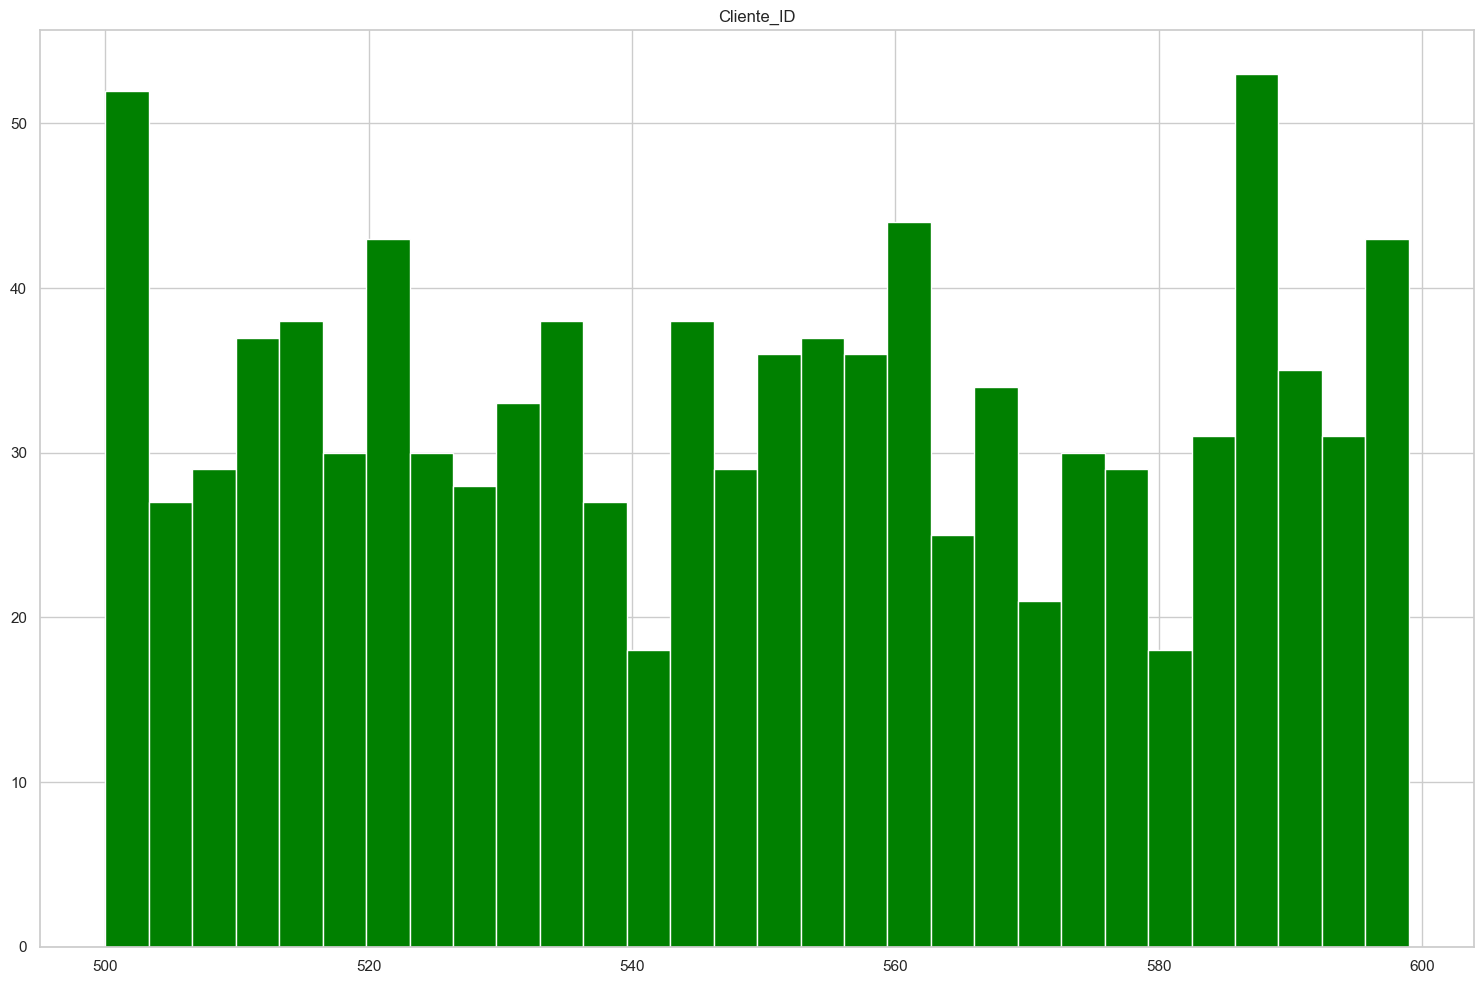

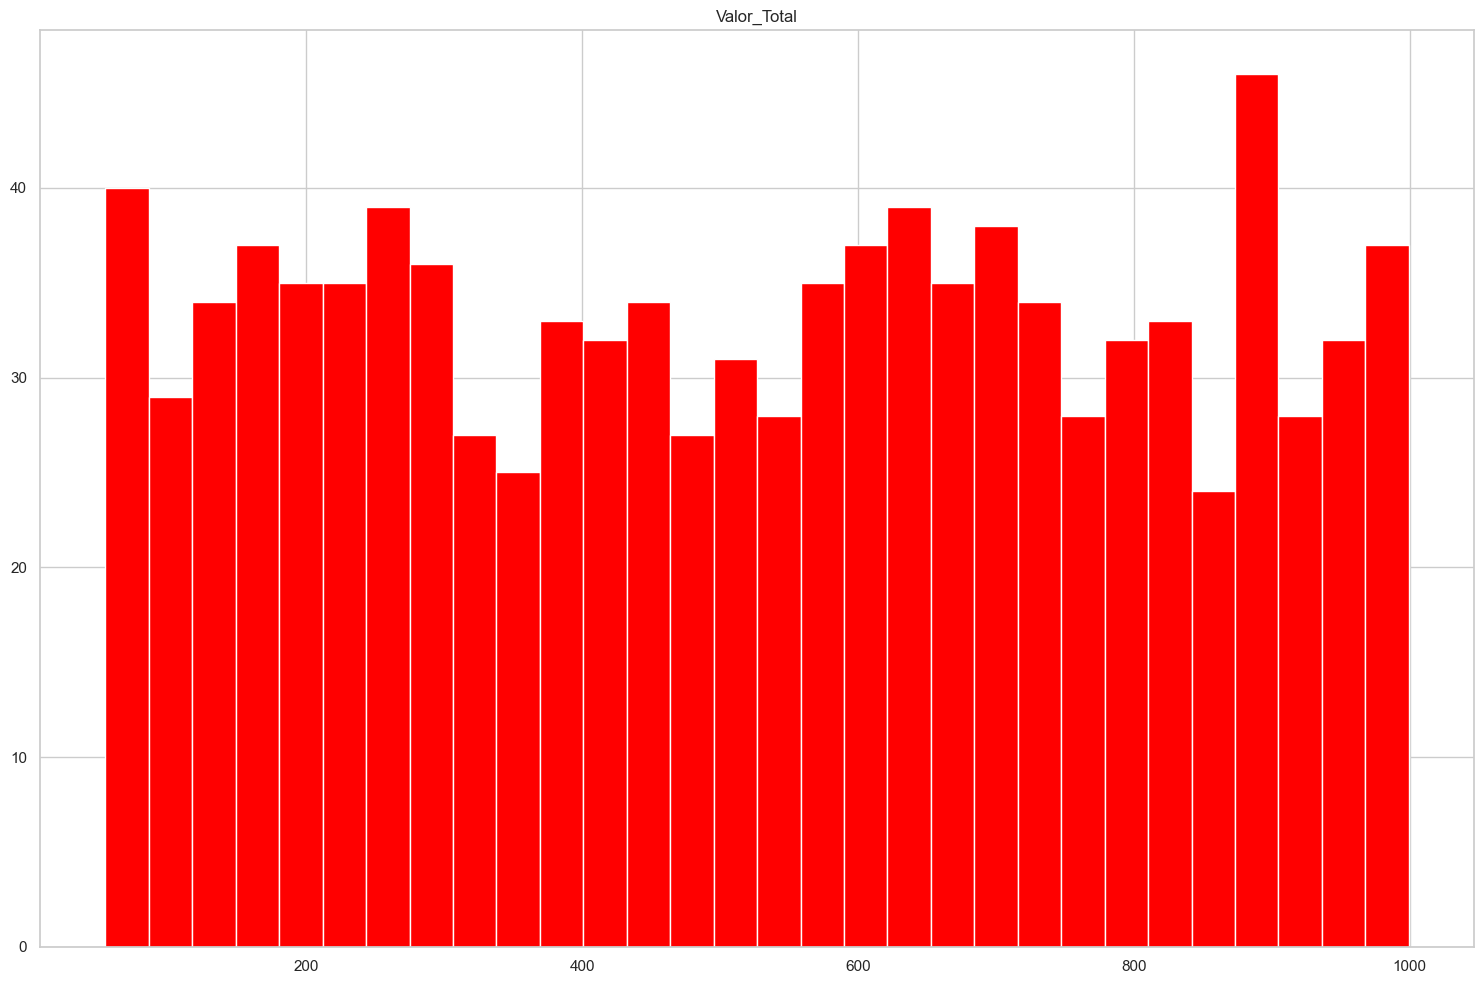

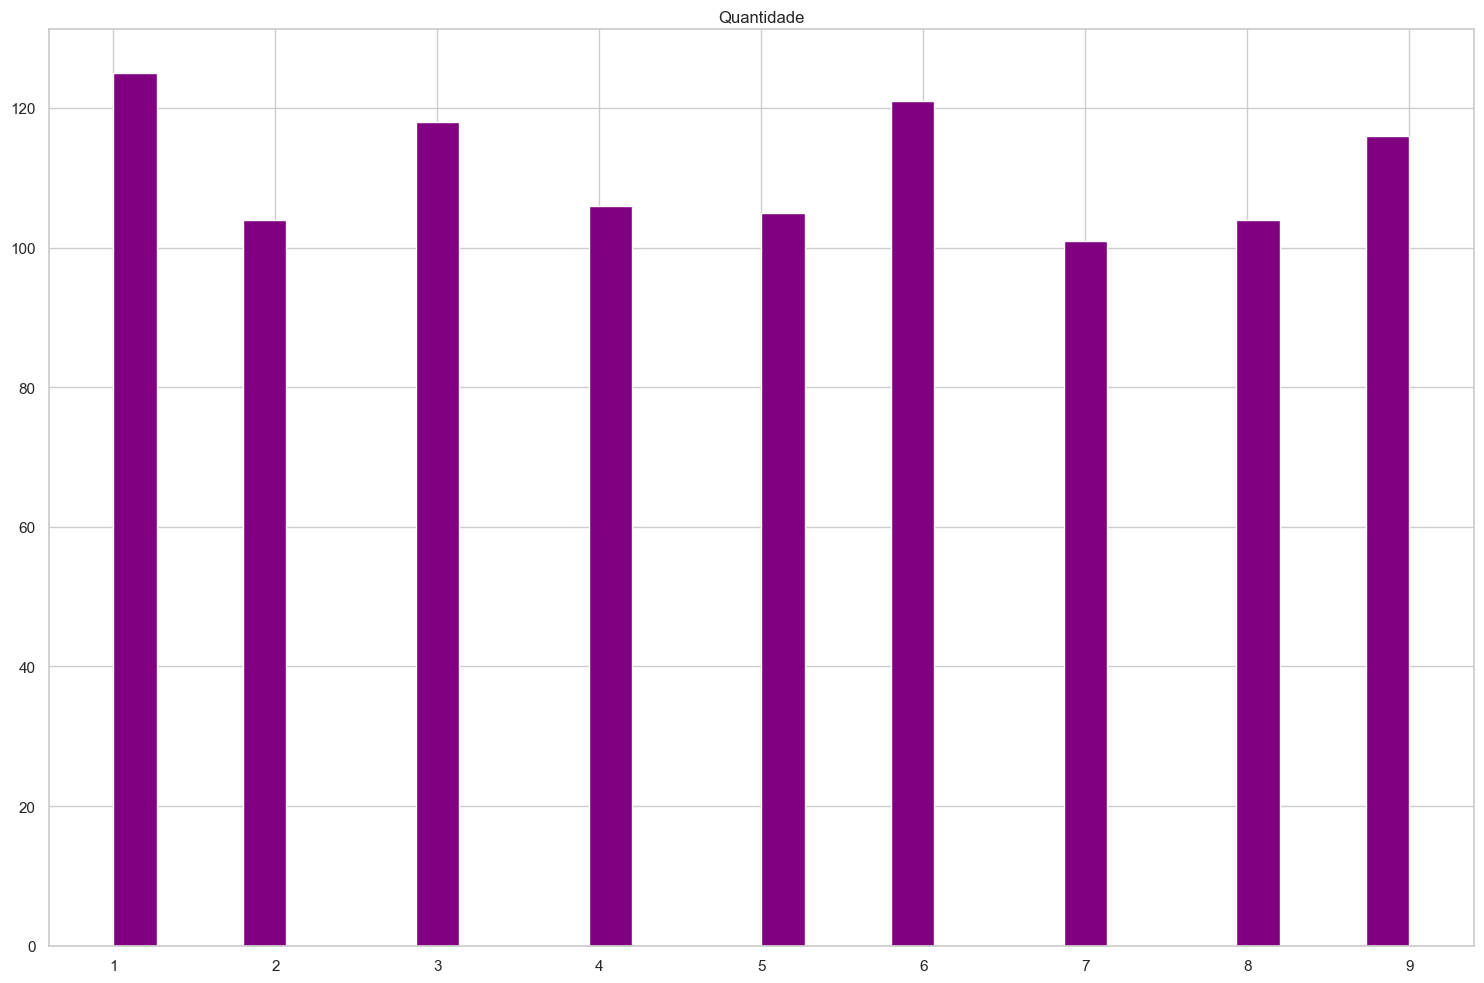

In [64]:
# df.select_dtypes(include='number').hist(figsize=(15,10), bins=30) # Histograma para as colunas numéricas
# plt.tight_layout() # Ajusta o layout para evitar certas sobreposições

colors = ['blue', 'green', 'red', 'purple']  # Define a lista de cores
numeric_columns = df.select_dtypes(include='number').columns  # Seleciona as colunas numéricas

for i, column in enumerate(numeric_columns):
    df[column].hist(figsize=(15, 10), bins=30, color=colors[i % len(colors)])  # Aplica a cor correspondente
    plt.title(column)  # Adiciona título ao gráfico
    plt.tight_layout()
    plt.show()

🔠 Análise de variáveis categóricas

In [65]:
for col in df.select_dtypes(include='object'):
    print(df[col].value_counts())
    print("-" * 40)


Data_Compra
2024-09-09    6
2025-09-09    6
2025-02-09    6
2026-02-09    6
2026-05-09    6
             ..
2025-01-26    1
2025-01-24    1
2025-01-23    1
2025-01-22    1
2026-09-26    1
Name: count, Length: 612, dtype: int64
----------------------------------------
Categoria_Produto
Esportes       220
Beleza         206
Eletrônicos    199
Casa           193
Roupas         182
Name: count, dtype: int64
----------------------------------------


📉 Correlações

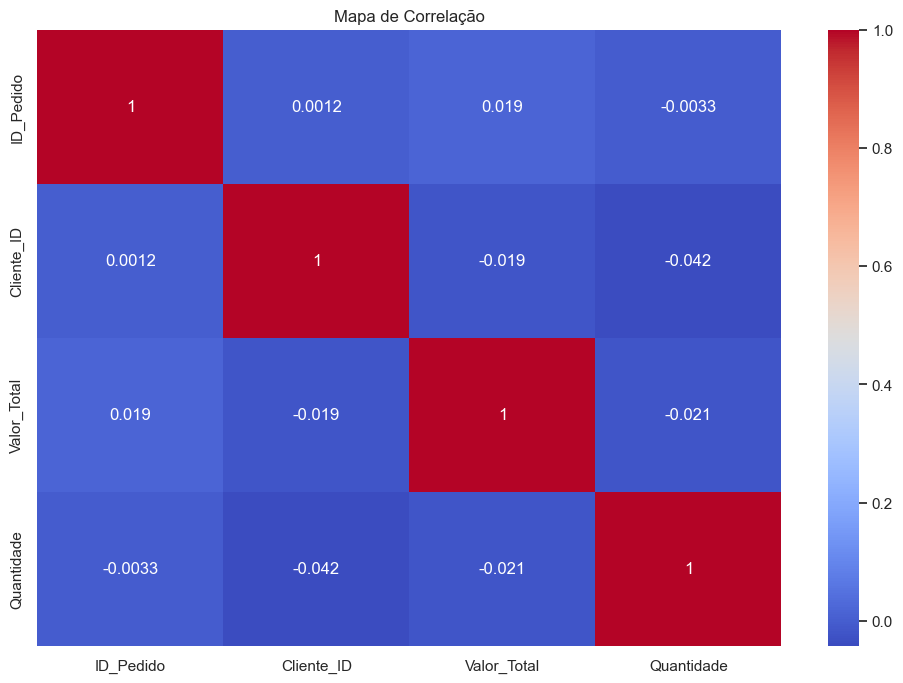

In [66]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Mapa de Correlação")
plt.show()

📌 Outliers (usando boxplots)

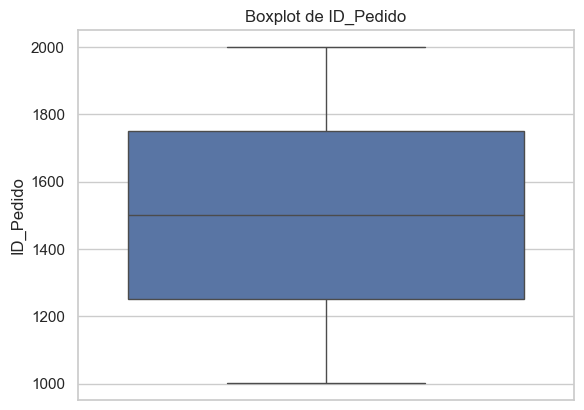

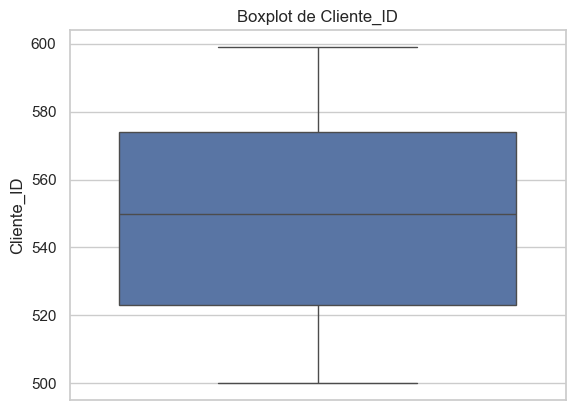

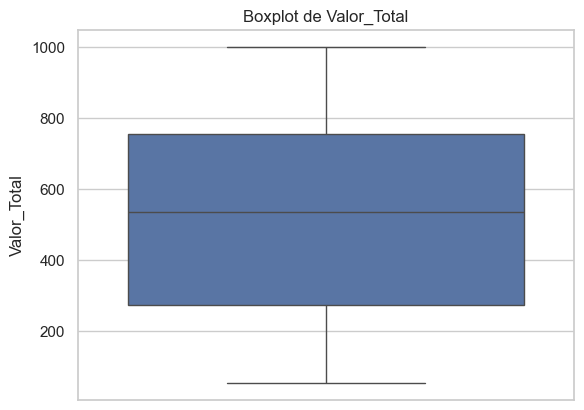

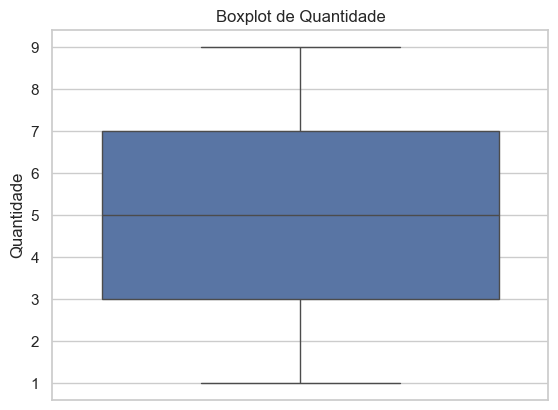

In [67]:
for col in df.select_dtypes(include='number'):
    sns.boxplot(data=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

📈 Relacionamentos entre variáveis

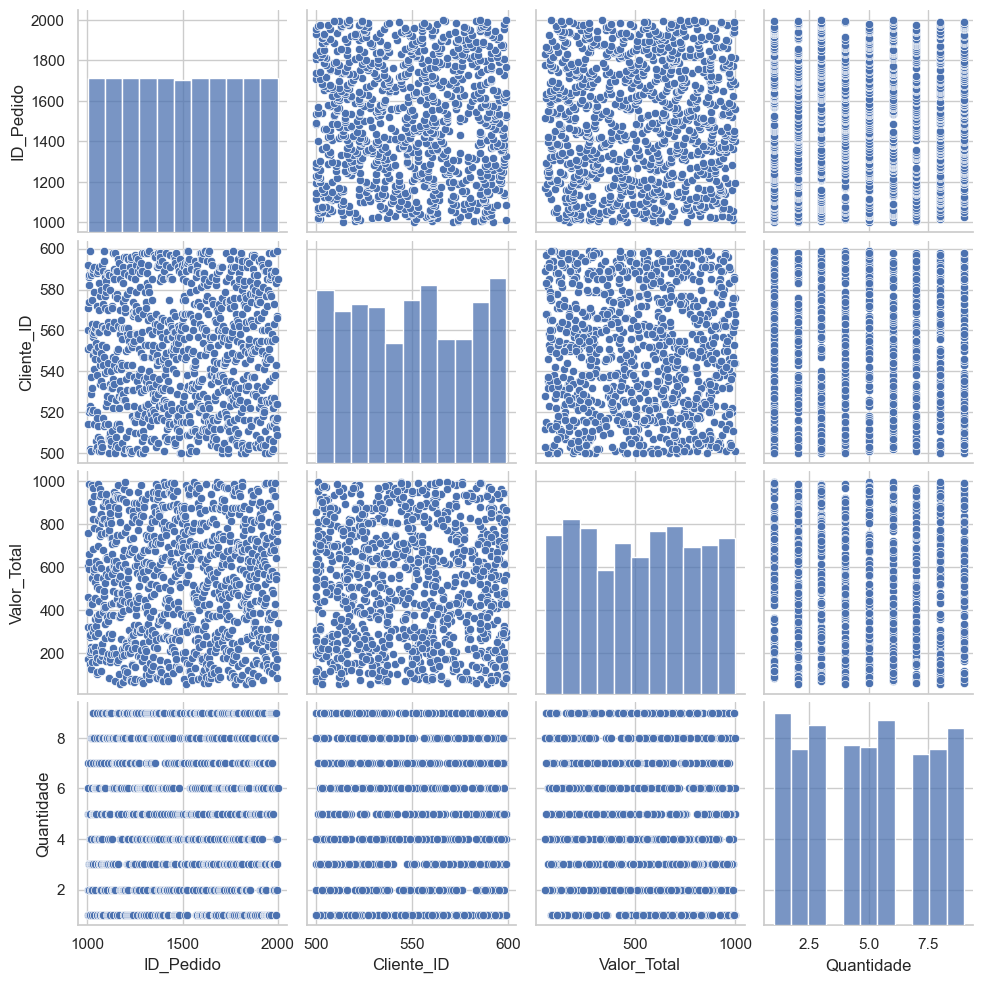

In [68]:
sns.pairplot(df.select_dtypes(include='number'))
plt.show()

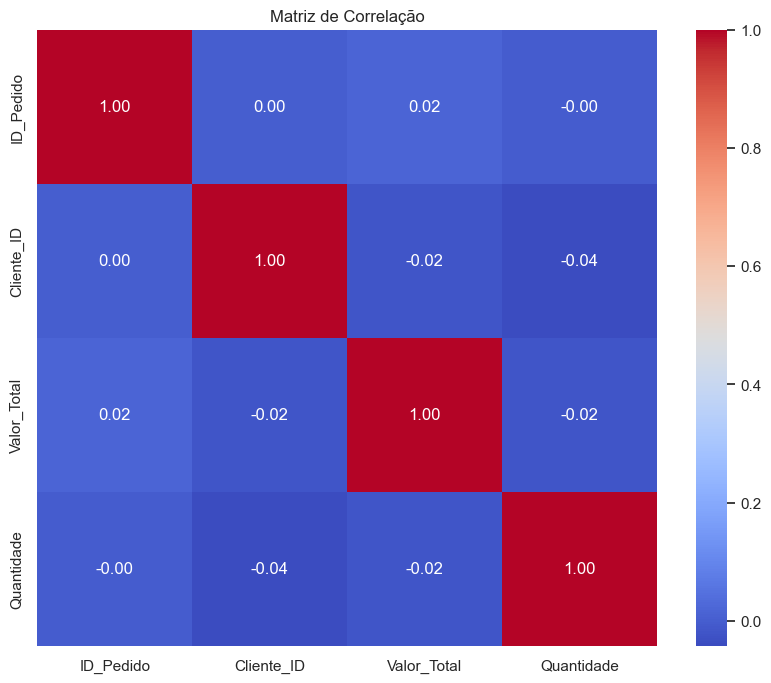

In [69]:
# Matriz de correlação
correlation = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()